# Code for exploring Titan telemetry data

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Checking that inventory files are in current working directory
 these inventory files are each one long list of the files contained within each directory of Titan telemetry data (directories are organized by year). Inventory files were generated with the following bash loop: 

for f in *.tar.xz 
do 
    tar tvf "$f" >>inventory.txt
done
 
This code reads all file names from each inventory file into one data frame-- columns are years.

In [2]:
#read in all files 
files = glob.glob('inventory*') 
print(files)

['inventory_2012', 'inventory_2013', 'inventory_2014', 'inventory_2015', 'inventory_2016', 'inventory_2017', 'inventory_2018', 'inventory_2019']


In [3]:
#create dataframe of all files, add columns for dates
df = pd.concat([pd.read_csv(f, delimiter="\t") for f in files], ignore_index=True, axis=1)
columns = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
df.columns = columns
df

,2012,2013,2014,2015,2016,2017,2018,2019
0,drwxrws--- 131 root stf019 262144 Aug 26 14:...,drwxrws--- 117 root stf019 262144 Aug 26 14:46 ..,-rw-r--r-- crayadm/crayadm 68800000 2014-01-20...,-rw-r--r-- crayadm/crayadm 143440 2015-01-27 1...,-rw-rw---- crayadm/crayadm 8947158 2016-01-01 ...,-rw-rw---- crayadm/crayadm 52394640 2017-03-15...,drwxrwx--- crayadm/crayadm 0 2018-10-23 10:3...,-rw-rw---- crayadm/crayadm 88021894 2019-04-27...
1,-rw-rw---- 1 root stf019 0 Jul 28 18:...,-rw-rw---- 1 root stf019 1136 Jul 29 21:11...,-rw-r--r-- crayadm/crayadm 332297 2014-01-15...,-rw-r--r-- crayadm/crayadm 6 2015-01-27 1...,-rw-rw---- crayadm/crayadm 22445537 2016-01-08...,-rw-rw---- crayadm/crayadm 15111074 2017-04-04...,-rw-rw---- crayadm/crayadm 149 2018-03-22 16:5...,-rw-r--r-- crayadm/crayadm 23004 2019-04-17...
2,-rw-rw---- 1 root stf019 48153414 Jul 28 18:...,drwxrws--- 2 root stf019 4096 Jul 29 21:11 .,-rw-rw---- crayadm/crayadm 4376 2014-01-17...,-rw-rw-r-- crayadm/crayadm 7136590 2015-02-03 ...,-rw-r--r-- crayadm/crayadm 6 2015-12-24...,-rw-rw---- crayadm/crayadm 11339012 2017-02-28...,-rw-rw---- crayadm/crayadm 149 2018-03-22 16:5...,-rw-r--r-- crayadm/crayadm 14120 2019-05-31...
3,-rw-rw---- 1 root stf019 2918 Jul 28 18:...,drwxrws--- 117 root stf019 262144 Aug 26 14:46 ..,-rw-r--r-- crayadm/crayadm 212080 2014-01-07...,-rw-r--r-- crayadm/crayadm 6 2015-01-27 ...,-rw-rw---- crayadm/crayadm 11061227 2015-12-26...,-rw-r--r-- crayadm/crayadm 5 2017-02-07...,-rw-rw---- crayadm/crayadm 3457 2018-03-22 16:...,-rw-rw---- crayadm/crayadm 106756 2019-04-30...
4,-rw-rw---- 1 root stf019 114 Jul 28 18:...,-rw-rw---- 1 root stf019 0 Jul 29 21:11...,-rw-r--r-- crayadm/crayadm 1135523840 2014-04-...,-rw-rw-r-- crayadm/crayadm 691570539 2015-01-3...,-rw-rw---- crayadm/crayadm 7187 2016-01-04...,-rw-rw---- crayadm/crayadm 17014018 2017-02-20...,-rw-rw---- crayadm/crayadm 622 2018-03-25 17:...,-rw-r--r-- crayadm/crayadm 21720 2019-04-14...
...,...,...,...,...,...,...,...,...
45709,NaN,NaN,-rw-rw-r-- crayadm/crayadm 248127440 2015-01-...,NaN,NaN,NaN,NaN,NaN
45710,NaN,NaN,-rw-r--r-- crayadm/crayadm 68800000 2015-01-...,NaN,NaN,NaN,NaN,NaN
45711,NaN,NaN,-rw-rw-r-- crayadm/crayadm 276170461 2015-01-...,NaN,NaN,NaN,NaN,NaN
45712,NaN,NaN,-rw-r--r-- crayadm/crayadm 470127 2015-01-...,NaN,NaN,NaN,NaN,NaN


### Transforming dataframe strings
changing string values in each column to just get to the basename of the files. Blank strings show up because of directories; these are changed to numpy NaNs. 

In [4]:
#series of dataframe regex transforms, ignore error warning
df = df.transform(lambda x: x.str.split().str[-1])
df = df.transform(lambda x: x.str.split('\/').str[-1])
df = df.transform(lambda x: x.str.replace('.', '-'))
df = df.transform(lambda x: x.str.split('-').str[0])
df = df.replace('', np.nan)

C:\Users\vkk\AppData\Local\Temp/ipykernel_62444/2411802849.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df = df.transform(lambda x: x.str.replace('.', '-'))


In [5]:
df

,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,hwerrlog,hwerrlog,messages,console,NaN,messages
1,BEGIN,bootinfo,me,consumer,messages,nlrd,alpsinit,consumer
2,bootinfo,NaN,messages,netwatch,consumer,nlrd,alpsinit,netwatch
3,config,NaN,hwerrlog,console,messages,consumer,apsys,dumpd
4,console,BEGIN,hwinv,console,dumpd,console,apsys,consumer
...,...,...,...,...,...,...,...,...
45709,NaN,NaN,messages,NaN,NaN,NaN,NaN,NaN
45710,NaN,NaN,hwerrlog,NaN,NaN,NaN,NaN,NaN
45711,NaN,NaN,messages,NaN,NaN,NaN,NaN,NaN
45712,NaN,NaN,consumer,NaN,NaN,NaN,NaN,NaN


### Reading in the value counts of each file "type" (i.e. basename)

In [6]:
#changing pandas settings so we can see all of the rows and columns
pd.set_option("max_rows", None)
pd.set_option("max_colwidth", None)
#getting the amount of times each file basename occurs per year
df_counts = df.apply(pd.Series.value_counts).fillna(0).astype(int)

In [7]:
df_counts

,2012,2013,2014,2015,2016,2017,2018,2019
0,1,0,0,0,1,0,0,0
0323,0,0,0,0,1,0,0,0
0512,0,0,0,0,0,0,1,0
072914,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
10,1,0,0,0,0,0,0,0
14337_ngetpage,0,0,0,0,0,0,1,0
14366_ngetpage,0,0,0,0,0,0,2,0
14383_ngetpage,0,0,0,0,0,0,2,0
2,0,0,0,0,1,0,0,0


### Reading in the N Largest (can change number to view)

In [8]:
df_counts.nlargest(5, columns)

,2012,2013,2014,2015,2016,2017,2018,2019
netwatch,1661,302,1046,778,720,712,721,301
hwerrlog,1088,446,418,272,994,498,129,39
console,364,300,648,523,527,458,399,156
consumer,300,245,609,517,509,460,397,156
nlrd,298,245,672,568,537,476,411,159


### Plotting top N file types

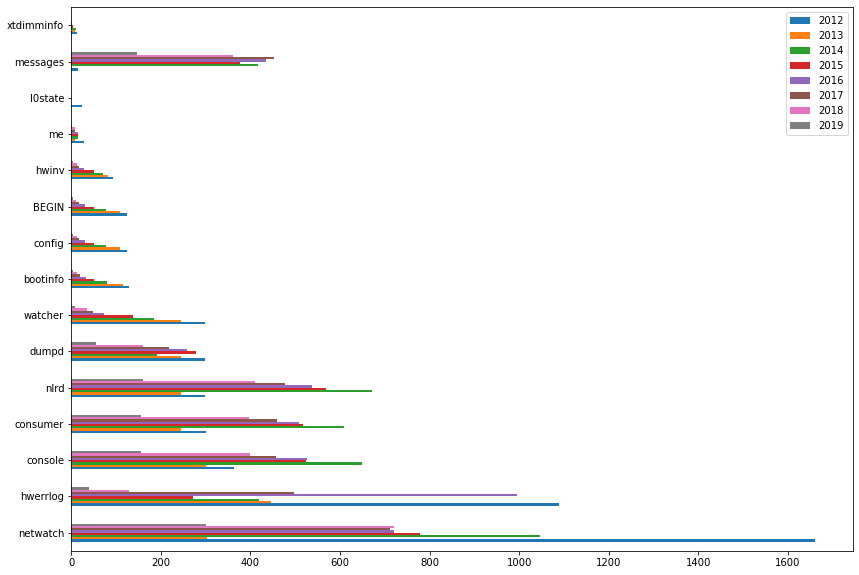

In [9]:
top_15 = df_counts.nlargest(15, columns)
top_15.plot(figsize=(14,10), kind='barh')
plt.show()

### Change year to explore individual years

In [10]:
df['2012'].value_counts().to_frame()

,2012
netwatch,1661
hwerrlog,1088
console,364
consumer,300
dumpd,298
nlrd,298
watcher,298
bootinfo,129
BEGIN,124
config,124


In [11]:
df_counts.to_csv('titan_filetype_counts.csv')

In [12]:
#show only files that appear 2012-2019
#no_zeros = df_counts[(df_counts != 0).all(1)]

#show files that appear 2014-2019
no_zeros = df_counts.loc[(df_counts.iloc[:,2:]!=0).all(1)]
no_zeros

,2012,2013,2014,2015,2016,2017,2018,2019
BEGIN,124,109,78,50,30,18,11,3
alpsinit,0,0,24434,23549,12875,8592,5632,1566
apbridge,0,0,410,376,433,409,365,146
apevent,0,0,412,376,433,408,365,146
apres,0,0,151,132,163,169,122,45
apsched,0,0,411,375,433,492,365,146
apsys,0,0,10088,9174,8674,7361,6585,2123
apwatch,0,0,377,329,429,405,365,145
bootinfo,129,115,79,51,33,19,12,4
config,124,109,78,50,30,18,12,3


In [13]:
#write to CSV file locally
no_zeros.to_csv('Titan_Log_Data_Summary_All_Years.csv')